# Project supervised learning - Drunk smurfs

Jean-Baptiste Maene - Denis Topallaj - Lander Pauwels Malengier 

## 0. Data-cleaning

In [96]:
# import dependencies

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

C:\Users\denis\AppData\Local\Temp\ipykernel_24876\816365406.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [97]:
# read the csv file

df = pd.read_csv('train_V2.csv')
df_test = pd.read_csv('score.csv')

## 0.1 Drop inconsistent or empty data

### 0.1.1 Dropping reoccurring empty rows

In [98]:
# when these three columns are not filled, the rest of the data is not filled.
# the rows without data are dropped.

indexes = df[(df['income_am'].isnull()) & (df['profit_last_am'].isnull()) & (df['profit_am'].isnull())].index

df = df.drop(index=indexes.array)

print('train', df.shape)

# same with the test file

indexes = df_test[(df_test['income_am'].isnull()) & (df_test['profit_last_am'].isnull()) & (df_test['profit_am'].isnull())].index

df_test = df_test.drop(index=indexes.array)

print('test', df_test.shape)


train (4947, 53)
test (496, 50)


### 0.1.2 Dropping duplicates

In [99]:
df.drop_duplicates()

df_test.drop_duplicates()

,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,...,score1_pos,score1_neg,score2_pos,score2_neg,score3_pos,score3_neg,score4_pos,score4_neg,score5_pos,score5_neg
0,5660.0,4320.0,8640.0,0.0,0.0,8000.0,0.0,0.0,1.0,0.0,...,0.538419,0.396819,0.423742,0.763608,NaN,NaN,NaN,NaN,NaN,NaN
1,3990.0,9.0,3450.0,0.0,0.0,12500.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1158.0,82.0,4194.0,408.0,4.0,12000.0,0.0,0.0,0.0,1.0,...,0.009811,0.592842,NaN,NaN,0.252444,0.724693,0.818064,0.387361,NaN,NaN
3,2451.0,791.0,2119.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,946.0,222.0,2036.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,820.0,216.0,7794.0,1103.0,3.0,9000.0,0.0,0.0,0.0,1.0,...,0.307239,0.660891,NaN,NaN,0.738333,0.914151,NaN,NaN,0.262224,8.060677
496,6092.0,2100.0,3137.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.419981,0.668320,NaN,NaN,NaN,NaN,NaN,NaN
497,2301.0,214.0,2516.0,0.0,0.0,11000.0,0.0,0.0,0.0,0.0,...,0.837325,0.663044,0.697171,0.353229,NaN,NaN,NaN,NaN,NaN,NaN
498,492.0,0.0,3716.0,713.0,2.0,5000.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.461598,4.757132


### 0.1.3 Dropping outliers

In [100]:
# score5_neg has scores ranging from 7995 trillion to -472 trillion and everything in between. score5_neg and score5_pos will be dropped.

# looking at the score of the other four scoring systems we can confidently say that score5_neg can be dropped (score5_pos also has to be dropped, because they both make a pair)

# quantile score can only range 0 < q < 1

columns = ["score5_neg", "score5_pos"]

for col in columns:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)

# dropping the score5 for the test data set

for col in columns:
    if col in df_test.columns:
        df_test.drop(col, axis=1, inplace=True)

print("train", df.shape)
print("test", df_test.shape)

train (4947, 51)
test (496, 48)


### 0.1.4 Dropping unethical/'useless' columns

In [101]:
# Having gender, place or origin, race ... as a factor to disallow smurfs from entering a hotel is unethical.

if "urban_ic" in df.columns and "neighbor_income" in df.columns and "gender" in df.columns:
	df = df.drop('urban_ic', axis=1)
	df = df.drop('neighbor_income', axis=1)
	df = df.drop('gender', axis=1)
 
if "urban_ic" in df_test.columns and "neighbor_income" in df_test.columns and "gender" in df_test.columns:
	df_test = df_test.drop('urban_ic', axis=1)
	df_test = df_test.drop('neighbor_income', axis=1)
	df_test = df_test.drop('gender', axis=1)

print("train", df.shape)
print("test", df_test.shape)

train (4947, 48)
test (496, 45)


## 0.2 Handle missing data

In [102]:
# These are the columns with missing data

print("train\n", df.isnull().sum()[df.isnull().sum() != 0])

print("\ntest\n", df_test.isnull().sum()[df_test.isnull().sum() != 0])

train
 cab_requests      35
dining_ic         35
presidential      35
tenure_mts       339
tenure_yrs       339
shop_use          35
score1_pos      3722
score1_neg      3633
score2_pos      3738
score2_neg      3643
score3_pos      3686
score3_neg      3580
score4_pos      3724
score4_neg      3623
dtype: int64

test
 cab_requests      1
dining_ic         1
presidential      1
tenure_mts       35
tenure_yrs       35
shop_use          1
score1_pos      374
score1_neg      362
score2_pos      385
score2_neg      372
score3_pos      360
score3_neg      351
score4_pos      377
score4_neg      370
dtype: int64


### 0.2.1 Using mean for missing data

In [103]:
from sklearn.impute import SimpleImputer

df_mean_imputed = df.copy()

# mean worthy columns
columns = ["cab_requests", "dining_ic", "presidential", "shop_use"]

for col in columns:
	mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

	mean_imputer = mean_imputer.fit(np.array(df[col]).reshape(-1, 1))
 
	df_mean_imputed[col] = mean_imputer.transform(np.array(df[col]).reshape(-1, 1))

print("train\n", df_mean_imputed.isnull().sum()[df_mean_imputed.isnull().sum() != 0])


# using mean_imputer for the test data
df_mean_imputed_test = df_test.copy()

# mean worthy columns
columns = ["cab_requests", "dining_ic", "presidential", "shop_use"]

for col in columns:
	mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

	mean_imputer = mean_imputer.fit(np.array(df_test[col]).reshape(-1, 1))
 
	df_mean_imputed_test[col] = mean_imputer.transform(np.array(df_test[col]).reshape(-1, 1))

print("\ntest\n", df_mean_imputed_test.isnull().sum()[df_mean_imputed_test.isnull().sum() != 0])



train
 tenure_mts     339
tenure_yrs     339
score1_pos    3722
score1_neg    3633
score2_pos    3738
score2_neg    3643
score3_pos    3686
score3_neg    3580
score4_pos    3724
score4_neg    3623
dtype: int64

test
 tenure_mts     35
tenure_yrs     35
score1_pos    374
score1_neg    362
score2_pos    385
score2_neg    372
score3_pos    360
score3_neg    351
score4_pos    377
score4_neg    370
dtype: int64


### 0.2.2 Using KNN for missing data

In [104]:
# K-Nearest Neighbors (KNN) Imputation will be used for "tenure_mts" and "tenure_yrs" because it is a good option when the missingness is random, and there is no clear pattern to the missing data.

from sklearn.impute import KNNImputer

df_knn_imputed = df_mean_imputed.copy()

columns = ["tenure_mts", "tenure_yrs"]

for col in columns:
	knn_imputer = KNNImputer(n_neighbors=5)
	imputed_col = knn_imputer.fit_transform(df_knn_imputed[[col]])
	df_knn_imputed[col] = imputed_col

print("train\n", df_knn_imputed.isnull().sum()[df_knn_imputed.isnull().sum() != 0])


# using the KNNImputer for the test data set

df_knn_imputed_test = df_mean_imputed_test.copy()

columns = ["tenure_mts", "tenure_yrs"]

for col in columns:
	knn_imputer = KNNImputer(n_neighbors=5)
	imputed_col = knn_imputer.fit_transform(df_knn_imputed_test[[col]])
	df_knn_imputed_test[col] = imputed_col

print("\ntest\n", df_knn_imputed_test.isnull().sum()[df_knn_imputed_test.isnull().sum() != 0])

train
 score1_pos    3722
score1_neg    3633
score2_pos    3738
score2_neg    3643
score3_pos    3686
score3_neg    3580
score4_pos    3724
score4_neg    3623
dtype: int64

test
 score1_pos    374
score1_neg    362
score2_pos    385
score2_neg    372
score3_pos    360
score3_neg    351
score4_pos    377
score4_neg    370
dtype: int64


### 0.2.3 Handle missing data for scores

In [105]:
# DROPPING THE SCORES BECAUSE CANNOT FIND A GOOD METHOD TO FILL IN THE DATA ATM

columns=["score1_neg", "score1_pos", "score2_pos", "score2_neg", "score3_pos", "score3_neg", "score4_pos", "score4_neg"]

for col in columns:
    if col in df_knn_imputed.columns:
        df_knn_imputed.drop(col, axis=1, inplace=True)

for col in columns:
    if col in df_knn_imputed_test.columns:
        df_knn_imputed_test.drop(col, axis=1, inplace=True)

# THIS IS SO THAT I CAN CONTINUE WITH OTHER STUFF
## IF A GOOD METHOD HAS BEEN FOUND TO FILL IN DATA, THEN THIS BLOCK WILL BE CHANGED 


## 0.3 Changing data types

### 0.3.1 changing floats to int

In [106]:
# These columns are not meant to be floats.
# ex.: You cannot have 0.214 of a child.
# The few that are floats are price or time related.

columns = ["damage_inc", "credit_use_ic", "gluten_ic", "lactose_ic", "insurance_ic", "spa_ic", "empl_ic", "cab_requests", "married_cd", "bar_no", "sport_ic", "age", "marketing_permit", "dining_ic", "presidential", "client_segment", "sect_empl", "prev_stay", "prev_all_in_stay", "divorce", "fam_adult_size", "children_no", "tenure_mts", "tenure_yrs", "company_ic", "claims_no", "nights_booked", "shop_use", "retired", "gold_status"]


for col in columns:
    if not df_knn_imputed[col].empty:
        df_knn_imputed[col] = df_knn_imputed[col].astype(np.uint8)
        
print("train\n", df_knn_imputed.info())

# change type to uint8 for the test data set

for col in columns:
    if not df_knn_imputed_test[col].empty:
        df_knn_imputed_test[col] = df_knn_imputed_test[col].astype(np.uint8)

print("\ntest\n", df_knn_imputed_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4947 entries, 0 to 4999
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   income_am              4947 non-null   float64
 1   profit_last_am         4947 non-null   float64
 2   profit_am              4947 non-null   float64
 3   damage_am              4947 non-null   float64
 4   damage_inc             4947 non-null   uint8  
 5   crd_lim_rec            4947 non-null   float64
 6   credit_use_ic          4947 non-null   uint8  
 7   gluten_ic              4947 non-null   uint8  
 8   lactose_ic             4947 non-null   uint8  
 9   insurance_ic           4947 non-null   uint8  
 10  spa_ic                 4947 non-null   uint8  
 11  empl_ic                4947 non-null   uint8  
 12  cab_requests           4947 non-null   uint8  
 13  married_cd             4947 non-null   uint8  
 14  bar_no                 4947 non-null   uint8  
 15  spor

## 0.4 Storing cleaned dataset

In [107]:
# the cleaned csv will now be in the file train_V2_cleaned and will be used for the rest of the calculations

df_knn_imputed.to_csv('train_V2_cleaned.csv', index=False)
df_knn_imputed.to_csv('score_cleaned.csv', index=False)

# 1.0 Projected revenue per client

In [108]:
df = pd.read_csv('train_V2_cleaned.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4947 entries, 0 to 4946
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   income_am              4947 non-null   float64
 1   profit_last_am         4947 non-null   float64
 2   profit_am              4947 non-null   float64
 3   damage_am              4947 non-null   float64
 4   damage_inc             4947 non-null   int64  
 5   crd_lim_rec            4947 non-null   float64
 6   credit_use_ic          4947 non-null   int64  
 7   gluten_ic              4947 non-null   int64  
 8   lactose_ic             4947 non-null   int64  
 9   insurance_ic           4947 non-null   int64  
 10  spa_ic                 4947 non-null   int64  
 11  empl_ic                4947 non-null   int64  
 12  cab_requests           4947 non-null   int64  
 13  married_cd             4947 non-null   int64  
 14  bar_no                 4947 non-null   int64  
 15  spor

## 1.1 Train/test-spit and standardisation

### 1.1.1 Shuffle data

In [109]:
from random import Random
df_shuffle = df.sample(frac=1, random_state=123)

### 1.1.2 Train/test-split

In [110]:
from sklearn.model_selection import train_test_split

X = df_shuffle.drop(['outcome_profit'],1)
y = df_shuffle['outcome_profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

C:\Users\denis\AppData\Local\Temp\ipykernel_24876\3570332103.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_shuffle.drop(['outcome_profit'],1)


### 1.1.3 Standardise

In [111]:
from sklearn.preprocessing import StandardScaler

num_feat = X_train.select_dtypes(include=['uint8', 'float64']).columns

scaler = StandardScaler()

scaler.fit(X_train[num_feat])

X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

X_train_stand[num_feat] = scaler.fit_transform(X_train[num_feat])
X_test_stand[num_feat] = scaler.transform(X_test[num_feat])

## 1.2 Polynomial regression

### 1.2.1 Cross-validation

In [112]:
# Calculate the best degree to use using the average score with cross-validation
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

avg_scores = [None] * 3
sd_scores = [None] * 3
for i in np.arange(0,3):
    reg_poly = Pipeline([('stand', StandardScaler()),
                  ('poly', PolynomialFeatures(degree=i)),
                  ('linear', LinearRegression(fit_intercept=False))])
    
    scores = cross_val_score(reg_poly, X_train, y_train, scoring = 'r2', cv=5)

    avg_scores[i] = scores.mean()
    sd_scores[i] = np.sqrt(scores.var())/np.sqrt(5)

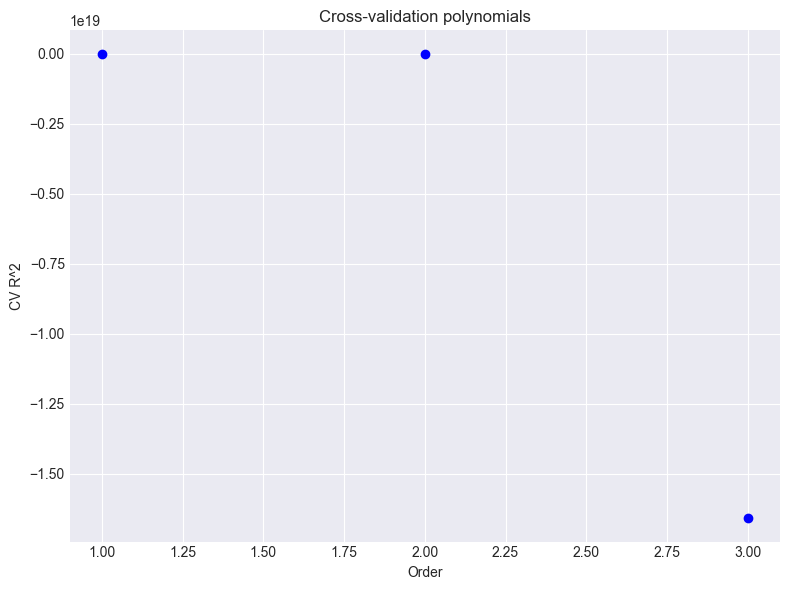

In [113]:
# Plotting the results

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(np.arange(1,4), avg_scores, c='b', label='data')
plt.axis('tight')
plt.title("Cross-validation polynomials")
ax.set_xlabel("Order");
ax.set_ylabel("CV R^2");
plt.tight_layout()
plt.show()

In [114]:
# The best order with the maximum R^2?

max_value = max(avg_scores)
max_index = avg_scores.index(max_value)
print('The order with maximum R^2 is '+str(max_index))

The order with maximum R^2 is 1


In [115]:
# Show the best score with the training set and testing set

reg_poly2 = Pipeline([('stand', StandardScaler()),
                  ('poly', PolynomialFeatures(degree=1)),
                  ('linear', LinearRegression(fit_intercept=False))])
reg_poly2.fit(X_train, y_train)
print(reg_poly2.score(X_train, y_train))
print(reg_poly2.score(X_test, y_test))

0.37536023807359387
0.4072360753333407
